# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd

# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [2]:
def K(X, Y, kernal = 'linear', kernal_param = 1):
    if kernal == 'poly':
        k = (1 + np.matmul(X, Y.T))**kernal_param
    if kernal == "linear":
        k = np.matmul(X, Y.T)
    if kernal == "rbf":
         k = np.exp(-kernal_param* sum((X- Y)**2))
    return k
def kernal_matrix(X, kernal = 'linear', kernal_param = 1):
    k = np.empty((X.shape[0], X.shape[0]))
    if kernal == 'poly':
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                k[i][j] = (1 + np.matmul(X[i], X[j].T))**kernal_param
    if kernal == "linear":
        for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                k[i][j] = np.matmul(X[i], X[j].T)
    if kernal == "rbf":
         for i in range(X.shape[0]):
            for j in range(X.shape[0]):
                k[i][j] = np.exp(-kernal_param* sum((X[i]- X[j])**2))
    return k
def sigmoid(x):
    return 1/(1+np.exp(-x))

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,kernel_param=1., num_iter_gd=100):
    cof = 1;
    alp = np.zeros(X.shape[0])
    k = kernal_matrix(X, kernel , kernel_param)
    for i in range(num_iter_gd):
        sigmoid_sum = 0
        for j in range(X.shape[0]):
            sigmoid_sum += (sigmoid(-Y[j]*np.matmul(alp.T, k[j])))*(-Y[j]*k[j])
        alp = alp - cof*(sigmoid_sum + reg_param*np.matmul(k, alp))
    return alp

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    test_Y = np.zeros((test_X.shape[0]))
    for i in range(test_X.shape[0]):
        s = 0
        for j in range(train_X.shape[0]):
           s += alpha[j]* K(train_X[j], test_X[i], kernel, kernel_param)
        if s-0.5 > 0:
            test_Y[i] = 1
        else:
            test_Y[i] = -1
    return test_Y
def zero_one_error(Y_actual, Y_pred):
    count = 0
    for i in range(Y_actual.shape[0]):
        if Y_actual[i] != Y_pred[i]:
            count += 1
    return count/Y_actual.shape[0]
def best_param(X, Y, kernel = "linear"):
    l = int(X.shape[0]*0.6)
    X_train = X[0:l]
    Y_train = Y[0:l]
    Y_test = Y[l:]
    X_test = X[l:]
    error = 101
    parameter = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
    for kernel_param in parameter:
        for reg_param in parameter:
            alp = train_pred_logistic_regression(X_train, Y_train, kernel, reg_param ,kernel_param, num_iter_gd=100)
            Y_pred = test_pred(alp, X_train, Y_train, X_test, kernel, kernel_param)
            if error > zero_one_error(Y_test, Y_pred):
                error = zero_one_error(Y_test, Y_pred)
                kernel_param_temp = kernel_param
                reg_param_temp = reg_param
    return kernel_param_temp, reg_param_temp

In [ ]:
print("Dataset A")
dataset_a = np.load('dataset_A.npz')
X_train_A = dataset_a['arr_0']
Y_train_A = dataset_a['arr_1']
X_test_A = dataset_a['arr_2']
Y_test_A = dataset_a['arr_3']
kernel_param_linear_A, reg_param_linear_A = best_param(X_train_A, Y_train_A, kernel = "linear")
print(kernel_param_linear_A, reg_param_linear_A)
alp_A_linear = train_pred_logistic_regression(X_train_A, Y_train_A, kernel='linear',reg_param = reg_param_linear_A ,kernel_param=kernel_param_linear_A)
print(zero_one_error(Y_train_A, test_pred(alp_A_linear, X_train_A, Y_train_A, X_train_A, "linear", kernel_param_linear_A)))
print(zero_one_error(Y_test_A, test_pred(alp_A_linear, X_train_A, Y_train_A, X_test_A, "linear", kernel_param_linear_A)))
kernel_param_poly_A, reg_param_poly_A = best_param(X_train_A, Y_train_A, kernel = "poly")
print(kernel_param_poly_A, reg_param_poly_A)
alp_A_poly = train_pred_logistic_regression(X_train_A, Y_train_A, kernel='poly',reg_param = reg_param_poly_A ,kernel_param=kernel_param_poly_A)
print(zero_one_error(Y_train_A, test_pred(alp_A_poly, X_train_A, Y_train_A, X_train_A, "poly", kernel_param_poly_A)))
print(zero_one_error(Y_test_A, test_pred(alp_A_poly, X_train_A, Y_train_A, X_test_A, "poly", kernel_param_poly_A)))
kernel_param_rbf_A, reg_param_rbf_A = best_param(X_train_A, Y_train_A, kernel = "rbf")
print(kernel_param_rbf_A, reg_param_rbf_A)
alp_A_rbf = train_pred_logistic_regression(X_train_A, Y_train_A, kernel='rbf',reg_param = reg_param_rbf_A ,kernel_param=kernel_param_rbf_A)
print(zero_one_error(Y_train_A, test_pred(alp_A_rbf, X_train_A, Y_train_A, X_train_A, "rbf", kernel_param_rbf_A)))
print(zero_one_error(Y_test_A, test_pred(alp_A_rbf, X_train_A, Y_train_A, X_test_A, "rbf", kernel_param_rbf_A)))
print("Dataset B")
dataset_b = np.load('dataset_B.npz')
X_train_B = dataset_b['arr_0']
Y_train_B = dataset_b['arr_1']
X_test_B = dataset_b['arr_2']
Y_test_B = dataset_b['arr_3']
kernel_param_linear_B, reg_param_linear_B = best_param(X_train_B, Y_train_B, kernel = "linear")
print(kernel_param_linear_B, reg_param_linear_B)
alp_B_linear = train_pred_logistic_regression(X_train_B, Y_train_B, kernel='linear',reg_param=reg_param_linear_B ,kernel_param=kernel_param_linear_B)
print(zero_one_error(Y_train_B, test_pred(alp_B_linear, X_train_B, Y_train_B, X_train_B, "linear", kernel_param_linear_B)))
print(zero_one_error(Y_test_B, test_pred(alp_B_linear, X_train_B, Y_train_B, X_test_B, "linear", kernel_param_linear_B)))
kernel_param_poly_B, reg_param_poly_B = best_param(X_train_B, Y_train_B, kernel = "poly")
print(kernel_param_poly_B, reg_param_poly_B)
alp_B_poly = train_pred_logistic_regression(X_train_B, Y_train_B, kernel='poly',reg_param=reg_param_poly_B ,kernel_param=kernel_param_poly_B)
print(zero_one_error(Y_train_B, test_pred(alp_B_poly, X_train_B, Y_train_B, X_train_B, "poly", kernel_param_poly_B)))
print(zero_one_error(Y_test_B, test_pred(alp_B_poly, X_train_B, Y_train_B, X_test_B, "poly", kernel_param_poly_B)))
kernel_param_rbf_B, reg_param_rbf_B = best_param(X_train_B, Y_train_B, kernel = "rbf")
print(kernel_param_rbf_B, reg_param_rbf_B)
alp_B_rbf = train_pred_logistic_regression(X_train_B, Y_train_B, kernel='rbf',reg_param=reg_param_rbf_B ,kernel_param=kernel_param_rbf_B)
print(zero_one_error(Y_train_B, test_pred(alp_B_rbf, X_train_B, Y_train_B, X_train_B, "rbf", kernel_param_rbf_B)))
print(zero_one_error(Y_test_B, test_pred(alp_B_rbf, X_train_B, Y_train_B, X_test_B, "rbf", kernel_param_rbf_B)))

dataset_c = np.load('dataset_C.npz')
X_train_C = dataset_c['arr_0']
Y_train_C = dataset_c['arr_1']
X_test_C = dataset_c['arr_2']
Y_test_C = dataset_c['arr_3']
kernel_param_linear_C, reg_param_linear_C = best_param(X_train_C, Y_train_C, kernel = "linear")
print(kernel_param_linear_C, reg_param_linear_C)
alp_C_linear = train_pred_logistic_regression(X_train_C, Y_train_C, kernel='linear',reg_param=reg_param_linear_C ,kernel_param=kernel_param_linear_C)
print(zero_one_error(Y_train_C, test_pred(alp_C_linear, X_train_C, Y_train_C, X_train_C, "linear", kernel_param_linear_C)))
print(zero_one_error(Y_test_C, test_pred(alp_C_linear, X_train_C, Y_train_C, X_test_C, "linear", kernel_param_linear_C)))
kernel_param_poly_C, reg_param_poly_C = best_param(X_train_C, Y_train_C, kernel = "poly")
print(kernel_param_poly_C, reg_param_poly_C)
alp_C_poly = train_pred_logistic_regression(X_train_C, Y_train_C, kernel='poly',reg_param=reg_param_poly_C ,kernel_param=kernel_param_poly_C)
print(zero_one_error(Y_train_C, test_pred(alp_C_poly, X_train_C, Y_train_C, X_train_C, "poly", kernel_param_poly_C)))
print(zero_one_error(Y_test_C, test_pred(alp_C_poly, X_train_C, Y_train_C, X_test_C, "poly", kernel_param_poly_C)))
kernel_param_rbf_C, reg_param_rbf_C = best_param(X_train_C, Y_train_C, kernel = "rbf")
print(kernel_param_rbf_C, reg_param_rbf_C)
alp_C_rbf = train_pred_logistic_regression(X_train_C, Y_train_C, kernel='rbf',reg_param=reg_param_rbf_C ,kernel_param=kernel_param_rbf_C)
print(zero_one_error(Y_train_C, test_pred(alp_C_rbf, X_train_C, Y_train_C, X_train_C, "rbf", kernel_param_rbf_C)))
print(zero_one_error(Y_test_C, test_pred(alp_C_rbf, X_train_C, Y_train_C, X_test_C, "rbf", kernel_param_rbf_C)))

dataset_d = np.load('dataset_D.npz')
X_train_D = dataset_d['arr_0']
Y_train_D = dataset_d['arr_1']
X_test_D = dataset_d['arr_2']
Y_test_D = dataset_d['arr_3']
kernel_param_linear_D, reg_param_linear_D = best_param(X_train_D, Y_train_D, kernel = "linear")
print(kernel_param_linear_D, reg_param_linear_D)
alp_D_linear = train_pred_logistic_regression(X_train_D, Y_train_D, kernel='linear',reg_param=reg_param_linear_D ,kernel_param=kernel_param_linear_D)
print(zero_one_error(Y_train_D, test_pred(alp_D_linear, X_train_D, Y_train_D, X_train_D, "linear", kernel_param_linear_D)))
print(zero_one_error(Y_test_D, test_pred(alp_D_linear, X_train_D, Y_train_D, X_test_D, "linear", kernel_param_linear_D)))
kernel_param_poly_D, reg_param_poly_D = best_param(X_train_D, Y_train_D, kernel = "poly")
print(kernel_param_poly_D, reg_param_poly_D)
alp_D_poly = train_pred_logistic_regression(X_train_D, Y_train_D, kernel='poly',reg_param=reg_param_poly_D ,kernel_param=kernel_param_poly_D)
print(zero_one_error(Y_train_D, test_pred(alp_D_poly, X_train_D, Y_train_D, X_train_D, "poly", kernel_param_poly_D)))
print(zero_one_error(Y_test_D, test_pred(alp_D_poly, X_train_D, Y_train_D, X_test_D, "poly", kernel_param_poly_D)))
kernel_param_rbf_D, reg_param_rbf_D = best_param(X_train_D, Y_train_D, kernel = "rbf")
print(kernel_param_rbf_D, reg_param_rbf_D)
alp_D_rbf = train_pred_logistic_regression(X_train_D, Y_train_D, kernel='rbf',reg_param=reg_param_rbf_D ,kernel_param=kernel_param_rbf_D)
print(zero_one_error(Y_train_D, test_pred(alp_D_rbf, X_train_D, Y_train_D, X_train_D, "rbf", kernel_param_rbf_D)))
print(zero_one_error(Y_test_D, test_pred(alp_D_rbf, X_train_D, Y_train_D, X_test_D, "rbf", kernel_param_rbf_D)))



Dataset A



|Dataset A||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.0001||0.0001|
|Poly||1||0.0001|
|RBF||10||0.001|

|Dataset A||Train_Error||Test_Error|
|-----||------||-------|
|Linear||0.25||0.23|
|Poly||0.13||0.138|
|RBF||0||0.004|

|Dataset B||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.258||0.252|
|Poly||0.324||0.326|
|RBF||0.22||0.26|

|Dataset B||Train_Error||Test_Error|
|-----||------||-------|
|Linear||0.0001||0.0001|
|Poly||1||0.0001|
|RBF||10||0.0001|

|Dataset C||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.0001||0.0001|
|Poly||0.0001||10|
|RBF||0.001||0.001|

|Dataset C||Train_Error||Test_Error|
|-----||------||-------|
|Linear||0.497||0.488|
|Poly||0.497||0.488|
|RBF||0.042||0.063|

|Dataset D||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.0001||0.0001|
|Poly||0.0001||0.0001|
|RBF||0.001||0.0001|

|Dataset D||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.5675||0.7692|
|Poly||0.4325||0.230|
|RBF||0||0.08|



plots


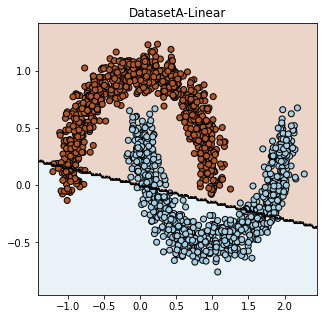

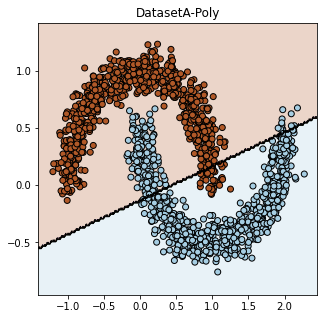

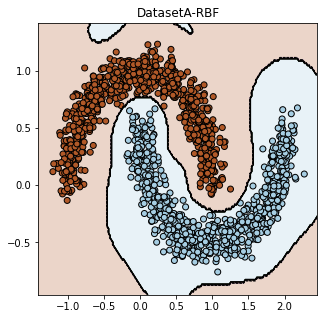

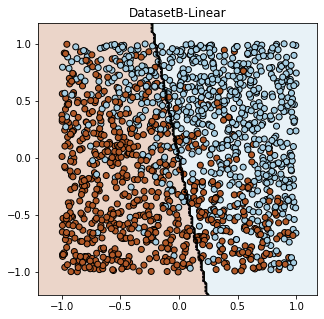

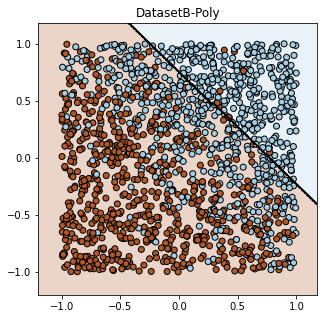

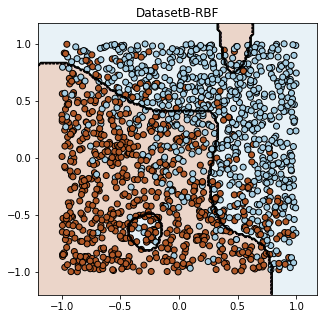

In [10]:
def plot_Logistic(X, Y, alp, kernel_param, kernel = "" , title  = "", h = 0.02):
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plot_x = np.c_[xx.ravel(), yy.ravel()]
    Z = test_pred(alp, X, Y, plot_x, kernel, kernel_param)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k')
    plt.title(title)
print("plots")
plot_Logistic(X_train_A, Y_train_A, alp_A_linear,0.0001, kernel = "linear", title = "DatasetA-Linear")
plot_Logistic(X_train_A, Y_train_A, alp_A_poly,1, kernel = "poly", title = "DatasetA-Poly")
plot_Logistic(X_train_A, Y_train_A, alp_A_rbf,10, kernel = "rbf", title = "DatasetA-RBF")
plot_Logistic(X_train_B, Y_train_B, alp_B_linear,0.0001, kernel = "linear", title = "DatasetB-Linear")
plot_Logistic(X_train_B, Y_train_B, alp_B_poly,1, kernel = "poly", title = "DatasetB-Poly")
plot_Logistic(X_train_B, Y_train_B, alp_B_rbf,10, kernel = "rbf", title = "DatasetB-RBF")

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [3]:
def train_predict_svm(X_train, Y_train, X_test, kernal = "linear", reg_param = 1, kernel_param = 2):
    if kernal ==  "poly":
        g = 1
    else:
        g = kernel_param
    cls = svm.SVC(C = reg_param, kernel = kernal, degree = kernel_param, gamma = g, coef0 = 1)
    cls.fit(X_train, Y_train)
    Y_pred = cls.predict(X_test)
    return Y_pred



In [ ]:
def best_param_svm(X, Y, kernel = "linear"):
    l = int(X.shape[0]*0.6)
    X_train = X[0:l]
    Y_train = Y[0:l]
    Y_test = Y[l:]
    X_test = X[l:]
    error = 101
    parameter = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
    for kernel_param in parameter:
        if kernel == "poly" and kernel_param > 10:
            k = 10
        else:
            k = kernel_param
        for reg_param in parameter:
            Y_pred = train_predict_svm(X_train, Y_train, X_test,kernel, reg_param, k)
            if error > zero_one_error(Y_test, Y_pred):
                error = zero_one_error(Y_test, Y_pred)
                kernel_param_temp = k
                reg_param_temp = reg_param
    return kernel_param_temp, reg_param_temp
dataset_a = np.load('dataset_A.npz')
X_train_A = dataset_a['arr_0']
Y_train_A = dataset_a['arr_1']
X_test_A = dataset_a['arr_2']
Y_test_A = dataset_a['arr_3']
kernel_param_linear_A_svm, reg_param_linear_A_svm = best_param_svm(X_train_A, Y_train_A,  "linear")
kernel_param_poly_A_svm, reg_param_poly_A_svm = best_param_svm(X_train_A, Y_train_A,  "poly")
kernel_param_rbf_A_svm, reg_param_rbf_A_svm = best_param_svm(X_train_A, Y_train_A, "rbf")
print(kernel_param_linear_A_svm, reg_param_linear_A_svm)
print(zero_one_error(Y_train_A, train_predict_svm(X_train_A, Y_train_A, X_train_A, kernal = "linear", 
                                                  reg_param = reg_param_linear_A_svm, kernel_param = kernel_param_linear_A_svm)))
print(zero_one_error(Y_test_A , train_predict_svm(X_train_A, Y_train_A, X_test_A, kernal = "linear", 
                                                  reg_param = reg_param_linear_A_svm, kernel_param = kernel_param_linear_A_svm)))
print(kernel_param_poly_A_svm, reg_param_poly_A_svm)
print(zero_one_error(Y_train_A, train_predict_svm(X_train_A, Y_train_A, X_train_A, kernal = "poly", 
                                                  reg_param = reg_param_poly_A_svm, kernel_param = kernel_param_poly_A_svm)))
print(zero_one_error(Y_test_A, train_predict_svm(X_train_A, Y_train_A, X_test_A, kernal = "poly", 
                                                  reg_param = reg_param_poly_A_svm, kernel_param = kernel_param_poly_A_svm)))
print(kernel_param_rbf_A_svm, reg_param_rbf_A_svm)
print(zero_one_error(Y_train_A, train_predict_svm(X_train_A, Y_train_A, X_train_A, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_A_svm, kernel_param = kernel_param_rbf_A_svm)))
print(zero_one_error(Y_test_A, train_predict_svm(X_train_A, Y_train_A, X_test_A, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_A_svm, kernel_param = kernel_param_rbf_A_svm)))
print("DatasetB")
dataset_b = np.load('dataset_B.npz')
X_train_B = dataset_b['arr_0']
Y_train_B = dataset_b['arr_1']
X_test_B = dataset_b['arr_2']
Y_test_B = dataset_b['arr_3']
kernel_param_linear_B_svm, reg_param_linear_B_svm = best_param_svm(X_train_B, Y_train_B,  "linear")
print(kernel_param_linear_B_svm, reg_param_linear_B_svm)
print(zero_one_error(Y_train_B, train_predict_svm(X_train_B, Y_train_B, X_train_B, kernal = "linear", 
                                                  reg_param = reg_param_linear_B_svm, kernel_param = kernel_param_linear_B_svm)))
print(zero_one_error(Y_test_B , train_predict_svm(X_train_B, Y_train_B, X_test_B, kernal = "linear", 
                                                  reg_param = reg_param_linear_B_svm, kernel_param = kernel_param_linear_B_svm)))
kernel_param_poly_B_svm, reg_param_poly_B_svm = best_param_svm(X_train_B, Y_train_B,  "poly")
print(kernel_param_poly_B_svm, reg_param_poly_B_svm)
print(zero_one_error(Y_train_B, train_predict_svm(X_train_B, Y_train_B, X_train_B, kernal = "poly", 
                                                  reg_param = reg_param_poly_B_svm, kernel_param = kernel_param_poly_B_svm)))
print(zero_one_error(Y_test_B, train_predict_svm(X_train_B, Y_train_B, X_test_B, kernal = "poly", 
                                                  reg_param = reg_param_poly_B_svm, kernel_param = kernel_param_poly_B_svm)))
kernel_param_rbf_B_svm, reg_param_rbf_B_svm = best_param_svm(X_train_B, Y_train_B, "rbf")
print(kernel_param_rbf_B_svm, reg_param_rbf_B_svm)
print(zero_one_error(Y_train_B, train_predict_svm(X_train_B, Y_train_B, X_train_B, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_B_svm, kernel_param = kernel_param_rbf_B_svm)))
print(zero_one_error(Y_test_B, train_predict_svm(X_train_B, Y_train_B, X_test_B, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_B_svm, kernel_param = kernel_param_rbf_B_svm)))
print("DatasetC")
dataset_c = np.load('dataset_C.npz')
X_train_C = dataset_c['arr_0']
Y_train_C = dataset_c['arr_1']
X_test_C = dataset_c['arr_2']
Y_test_C = dataset_c['arr_3']
kernel_param_linear_C_svm, reg_param_linear_C_svm = best_param_svm(X_train_C, Y_train_C,  "linear")
print(kernel_param_linear_C_svm, reg_param_linear_B_svm)
print(zero_one_error(Y_train_C, train_predict_svm(X_train_C, Y_train_C, X_train_C, kernal = "linear", 
                                                  reg_param = reg_param_linear_C_svm, kernel_param = kernel_param_linear_C_svm)))
print(zero_one_error(Y_test_C , train_predict_svm(X_train_C, Y_train_C, X_test_C, kernal = "linear", 
                                                  reg_param = reg_param_linear_C_svm, kernel_param = kernel_param_linear_C_svm)))
kernel_param_poly_C_svm, reg_param_poly_C_svm = best_param_svm(X_train_C, Y_train_C,  "poly")
print(kernel_param_poly_C_svm, reg_param_poly_C_svm)
print(zero_one_error(Y_train_C, train_predict_svm(X_train_C, Y_train_C, X_train_C, kernal = "poly", 
                                                  reg_param = reg_param_poly_C_svm, kernel_param = kernel_param_poly_C_svm)))
print(zero_one_error(Y_test_C, train_predict_svm(X_train_C, Y_train_C, X_test_C, kernal = "poly", 
                                                  reg_param = reg_param_poly_C_svm, kernel_param = kernel_param_poly_C_svm)))
kernel_param_rbf_C_svm, reg_param_rbf_C_svm = best_param_svm(X_train_C, Y_train_C, "rbf")
print(kernel_param_rbf_C_svm, reg_param_rbf_C_svm)
print(zero_one_error(Y_train_C, train_predict_svm(X_train_C, Y_train_C, X_train_C, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_C_svm, kernel_param = kernel_param_rbf_C_svm)))
print(zero_one_error(Y_test_C, train_predict_svm(X_train_A, Y_train_A, X_test_A, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_C_svm, kernel_param = kernel_param_rbf_C_svm)))
print("DatasetD")
dataset_d = np.load('dataset_D.npz')
X_train_D = dataset_d['arr_0']
Y_train_D = dataset_d['arr_1']
X_test_D = dataset_d['arr_2']
Y_test_D = dataset_d['arr_3']
kernel_param_linear_D_svm, reg_param_linear_D_svm = best_param_svm(X_train_D, Y_train_D,  "linear")


print(kernel_param_linear_D_svm, reg_param_linear_D_svm)
print(zero_one_error(Y_train_D, train_predict_svm(X_train_D, Y_train_D, X_train_D, kernal = "linear", 
                                                  reg_param = reg_param_linear_D_svm, kernel_param = kernel_param_linear_D_svm)))
print(zero_one_error(Y_test_D , train_predict_svm(X_train_D, Y_train_D, X_test_D, kernal = "linear", 
                                                  reg_param = reg_param_linear_D_svm, kernel_param = kernel_param_linear_D_svm)))
kernel_param_poly_D_svm, reg_param_poly_D_svm = best_param_svm(X_train_D, Y_train_D,  "poly")
print(kernel_param_poly_D_svm, reg_param_poly_D_svm)
print(zero_one_error(Y_train_D, train_predict_svm(X_train_D, Y_train_D, X_train_D, kernal = "poly", 
                                                  reg_param = reg_param_poly_D_svm, kernel_param = kernel_param_poly_D_svm)))
print(zero_one_error(Y_test_D, train_predict_svm(X_train_D, Y_train_D, X_test_D, kernal = "poly", 
                                                  reg_param = reg_param_poly_D_svm, kernel_param = kernel_param_poly_D_svm)))
kernel_param_rbf_D_svm, reg_param_rbf_D_svm = best_param_svm(X_train_D, Y_train_D, "rbf")
print(kernel_param_rbf_D_svm, reg_param_rbf_D_svm)
print(zero_one_error(Y_train_D, train_predict_svm(X_train_D, Y_train_D, X_train_D, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_D_svm, kernel_param = kernel_param_rbf_D_svm)))
print(zero_one_error(Y_test_D, train_predict_svm(X_train_D, Y_train_D, X_test_D, kernal = "rbf", 
                                                  reg_param = reg_param_rbf_D_svm, kernel_param = kernel_param_rbf_D_svm)))

0.0001 10.0
0.12933333333333333
0.134
10.0 0.001
0.0
0.006
0.1 1000.0
0.0006666666666666666
0.002
DatasetB
0.0001 1.0
0.178
0.206
0.001 1000.0
0.17466666666666666
0.21
DatasetC


 |Dataset A||Kernel Parameter||Reg parameter|
|-----||------||-------|
|Linear||0.0001||10|
|Poly||10||0.001|
|RBF||0.1||1000|
 
 |Dataset A||Train_Error||Test_Error|
|-----||------||-------|
|Linear||0.129||0.134|
|Poly||0||0.006|
|RBF||0||0.002|

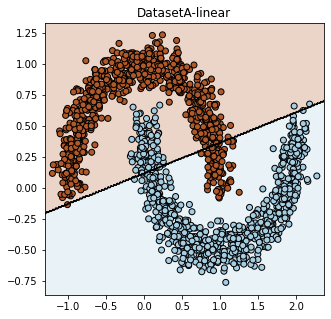

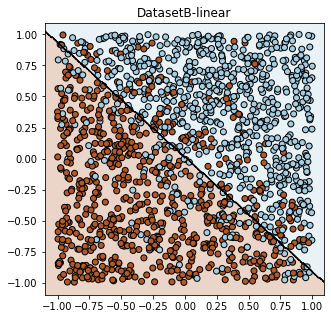

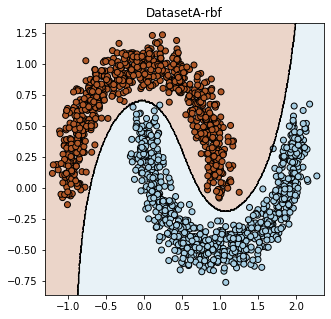

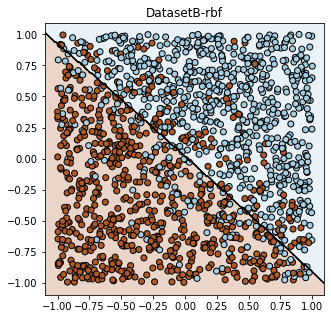

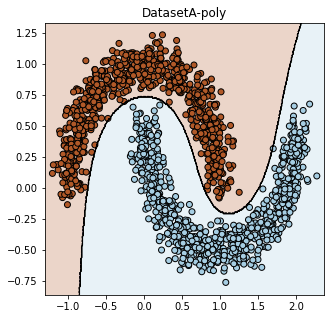

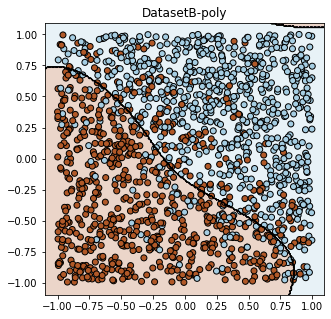

In [6]:
def plot_svm(X, Y, reg_param, kernel_param, title  = "", h = 0.01, kernal = "" ):
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plot_x = np.c_[xx.ravel(), yy.ravel()]
    Z = train_predict_svm(X, Y, plot_x, kernal, reg_param, kernel_param)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k')
    plt.title(title)
dataset_a = np.load('dataset_A.npz')
X_train_A = dataset_a['arr_0']
Y_train_A = dataset_a['arr_1']
X_test_A = dataset_a['arr_2']
Y_test_A = dataset_a['arr_3']
dataset_b = np.load('dataset_B.npz')
X_train_B = dataset_b['arr_0']
Y_train_B = dataset_b['arr_1']
X_test_B = dataset_b['arr_2']
Y_test_B = dataset_b['arr_3']

plot_svm(X_train_A,Y_train_A, 10, 0.001, title = "DatasetA-linear" , kernal = "linear")
plot_svm(X_train_B,Y_train_B, 1, 0.001, title = "DatasetB-linear" , kernal = "linear")
plot_svm(X_train_A,Y_train_A, 1000, 0.1, title = "DatasetA-rbf" , kernal = "rbf")
plot_svm(X_train_B,Y_train_B, 1000, 0.001, title = "DatasetB-rbf" , kernal = "rbf")
plot_svm(X_train_A,Y_train_A, 0.001, 10, title = "DatasetA-poly" , kernal = "poly")
plot_svm(X_train_B,Y_train_B, 0.001, 10, title = "DatasetB-poly" , kernal = "poly")

# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [20]:
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right= None, node_position = None,*, result = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.node_position = node_position
        self.result = result
def H(P):
    if P == 1 or P == 0:
        return 0
    else:
        return P*np.log2(1/P) + (1-P)*np.log2(1/(1-P))
def best_split(X,Y, criterion):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    if criterion =='accuracy':
        accuracy  = -1
        for feat_indx in range(n_feats):
            X_column = X[:, feat_indx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                left_idxs = np.argwhere(X_column < thr).flatten()
                right_idxs = np.argwhere(X_column >= thr).flatten()
                Y_left = Y[left_idxs]
                Y_right = Y[right_idxs]
                threshold_class_Y_left = 1 if np.argmax(np.histogram(Y_left, bins = 2)[0]) == 1 else -1
                threshold_class_Y_right = 1 if np.argmax(np.histogram(Y_right, bins = 2)[0]) == 1 else -1
                count  = 0
                for index in left_idxs:
                    if Y[index] == threshold_class_Y_left:
                        count += 1
                for index in right_idxs:
                    if Y[index] == threshold_class_Y_right:
                        count += 1
                potential_accuracy = count/n_samples
                if potential_accuracy >= accuracy:
                    accuracy = potential_accuracy
                    threshold_Y_left = Y_left
                    threshold_Y_right = Y_right
                    threshold_X_left = X[left_idxs, :]
                    threshold_X_right = X[right_idxs, :]
                    threshold_feat_indx = feat_indx
                    threshold_thr = thr
        return threshold_Y_left, threshold_Y_right, threshold_X_left, threshold_X_right, threshold_feat_indx, threshold_thr
    if criterion =='entropy':
        entropy = 10000
        for feat_indx in range(n_feats):
            X_column = X[:, feat_indx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                left_idxs = np.argwhere(X_column < thr).flatten()
                right_idxs = np.argwhere(X_column >= thr).flatten()
                Y_left = Y[left_idxs]
                Y_right = Y[right_idxs]
                threshold_class_Y_left = 1 if np.argmax(np.histogram(Y_left, bins = 2)[0]) == 1 else -1
                threshold_class_Y_right = 1 if np.argmax(np.histogram(Y_right, bins = 2)[0]) == 1 else -1
                count_left, count_right = 0, 0
                for index in left_idxs:
                    if Y[index] == threshold_class_Y_left:
                        count_left += 1
                for index in right_idxs:
                    if Y[index] == threshold_class_Y_right:
                        count_right += 1
                if len(Y_left) != 0 and len(Y_right) != 0:
                    potential_entropy = (len(Y_left)/len(Y))*H(count_left/len(Y_left)) + (len(Y_right)/len(Y))*H(count_right/len(Y_right))
                if len(Y_left) == 0:
                    potential_entropy = (len(Y_right)/len(Y))*H(count_right/len(Y_right))
                if len(Y_right) == 0:
                     potential_entropy = (len(Y_left)/len(Y))*H(count_left/len(Y_left))
                if potential_entropy < entropy:
                    entropy = potential_entropy
                    threshold_Y_left = Y_left
                    threshold_Y_right = Y_right
                    threshold_X_left = X[left_idxs, :]
                    threshold_X_right = X[right_idxs, :]
                    threshold_feat_indx = feat_indx
                    threshold_thr = thr
        return threshold_Y_left, threshold_Y_right, threshold_X_left, threshold_X_right, threshold_feat_indx, threshold_thr

def add_node(X, Y, node_position, num_nodes_stop=1, criterion='accuracy'):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    if(node_position >= num_nodes_stop or n_labels == 1 or n_samples <= 0):
        threshold_class = 1 if np.argmax(np.histogram(Y, bins = 2)[0]) == 1 else -1
        return Node(result = threshold_class)
    Y_left, Y_right, X_left, X_right, feat, thr = best_split(X,Y, criterion)
    left = add_node(X_left, Y_left, 2*node_position, num_nodes_stop, criterion)
    right = add_node(X_right, Y_right, 2*node_position + 1, num_nodes_stop, criterion)
    return Node(feat, thr, left, right, node_position)

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    n_features = X.shape[1]
    return add_node(X,Y,1,num_nodes_stop,criterion)

def travesre_tree(root, x):
    if root.result != None:
        return root.result
    if x[root.feature] < root.threshold:
        return travesre_tree(root.left, x)
    return travesre_tree(root.right, x)
    

def eval_decision_tree(tree, test_X):
    return np.array([travesre_tree(tree, x) for x in test_X])





In [10]:
def zero_one_error(Y_actual, Y_pred):
    count = 0
    for i in range(Y_actual.shape[0]):
        if Y_actual[i] != Y_pred[i]:
            count += 1
    return count/Y_actual.shape[0]
def best_num_node_stop(X, Y, criterion='accuracy'):
    l = int(X.shape[0]*0.6)
    X_train = X[0:l]
    Y_train = Y[0:l]
    Y_test = Y[l:]
    X_test = X[l:]
    error = 101
    for num_nodes_stop in [1,10,100,1000,10000]:
        tree =  train_decision_tree(X_train, Y_train, num_nodes_stop, criterion='accuracy')
        Y_pred =  eval_decision_tree(tree, X_test)
        error_temp = zero_one_error(Y_test, Y_pred)
        if error > error_temp:
            error = error_temp
            best_param = num_nodes_stop
    return best_param
dataset_a = np.load('dataset_A.npz')
X_train_A = dataset_a['arr_0']
Y_train_A = dataset_a['arr_1']
X_test_A = dataset_a['arr_2']
Y_test_A = dataset_a['arr_3']
print(best_num_node_stop(X_train_A, Y_train_A, criterion='accuracy'))
print(best_num_node_stop(X_train_A, Y_train_A, criterion='entropy'))
learn_tree_A_accuracy =  train_decision_tree(X_train_A, Y_train_A, 10, criterion='accuracy')
print(zero_one_error(Y_train_A, eval_decision_tree(learn_tree_A_accuracy, X_train_A)))
print(zero_one_error(Y_test_A, eval_decision_tree(learn_tree_A_accuracy, X_test_A)))
learn_tree_A_entropy =  train_decision_tree(X_train_A, Y_train_A, 10, criterion='entropy')
print(zero_one_error(Y_train_A, eval_decision_tree(learn_tree_A_entropy, X_train_A)))
print(zero_one_error(Y_test_A, eval_decision_tree(learn_tree_A_entropy, X_test_A)))
dataset_b = np.load('dataset_B.npz')
X_train_B = dataset_b['arr_0']
Y_train_B = dataset_b['arr_1']
X_test_B = dataset_b['arr_2']
Y_test_B = dataset_b['arr_3']
num_node_B_accuracy = best_num_node_stop(X_train_B, Y_train_B, criterion='accuracy')
print(num_node_B_accuracy)
num_node_B_entropy = best_num_node_stop(X_train_B, Y_train_B, criterion='entropy')
print(num_node_B_entropy)
learn_tree_B_accuracy =  train_decision_tree(X_train_B, Y_train_B, num_node_B_accuracy, criterion='accuracy')
print(zero_one_error(Y_train_B, eval_decision_tree(learn_tree_B_accuracy, X_train_B)))
print(zero_one_error(Y_test_B, eval_decision_tree(learn_tree_B_accuracy, X_test_B)))
learn_tree_B_entropy =  train_decision_tree(X_train_B, Y_train_B, num_node_B_entropy, criterion='entropy')
print(zero_one_error(Y_train_B, eval_decision_tree(learn_tree_B_entropy, X_train_B)))
print(zero_one_error(Y_test_B, eval_decision_tree(learn_tree_B_entropy, X_test_B)))
dataset_c = np.load('dataset_C.npz')
X_train_C = dataset_c['arr_0']
Y_train_C = dataset_c['arr_1']
X_test_C = dataset_c['arr_2']
Y_test_C = dataset_c['arr_3']
num_node_C_accuracy = best_num_node_stop(X_train_C, Y_train_C, criterion='accuracy')
print(num_node_C_accuracy)
num_node_C_entropy = best_num_node_stop(X_train_C, Y_train_C, criterion='entropy')
print(num_node_C_entropy)
learn_tree_C_accuracy =  train_decision_tree(X_train_C, Y_train_C, num_node_C_accuracy, criterion='accuracy')
print(zero_one_error(Y_train_C, eval_decision_tree(learn_tree_C_accuracy, X_train_C)))
print(zero_one_error(Y_test_C, eval_decision_tree(learn_tree_C_accuracy, X_test_C)))
learn_tree_C_entropy =  train_decision_tree(X_train_C, Y_train_C, num_node_C_entropy, criterion='entropy')
print(zero_one_error(Y_train_C, eval_decision_tree(learn_tree_C_entropy, X_train_C)))
print(zero_one_error(Y_test_C, eval_decision_tree(learn_tree_C_entropy, X_test_C)))
dataset_d = np.load('dataset_D.npz')
X_train_D = dataset_d['arr_0']
Y_train_D = dataset_d['arr_1']
X_test_D = dataset_d['arr_2']
Y_test_D = dataset_d['arr_3']
num_node_D_accuracy = best_num_node_stop(X_train_D, Y_train_D, criterion='accuracy')
print(num_node_D_accuracy)
num_node_D_entropy = best_num_node_stop(X_train_D, Y_train_D, criterion='entropy')
print(num_node_D_entropy)
learn_tree_D_accuracy =  train_decision_tree(X_train_D, Y_train_D, num_node_D_accuracy, criterion='accuracy')
print(zero_one_error(Y_train_D, eval_decision_tree(learn_tree_D_accuracy, X_train_D)))
print(zero_one_error(Y_test_D, eval_decision_tree(learn_tree_D_accuracy, X_test_D)))
learn_tree_D_entropy =  train_decision_tree(X_train_D, Y_train_D, num_node_D_entropy, criterion='entropy')
print(zero_one_error(Y_train_D, eval_decision_tree(learn_tree_D_entropy, X_train_D)))
print(zero_one_error(Y_test_D, eval_decision_tree(learn_tree_D_entropy, X_test_D)))

10
10
0.078
0.102
0.36
0.378
100
100
0.154
0.212
0.31066666666666665
0.344
10
10
0.11
0.13468013468013468
0.36533333333333334
0.37373737373737376
10
10
0.035
0.10650887573964497
0.41
0.2485207100591716


|HyperParameter||accuracy||entropy|
|-------||------||--------|
|DatasetA||10||10|
|DatasetB||100||100|
|DatasetC||10||10|
|Dataset||10||10|

|DatasetA-error||accuracy||entropy|
|-------||------||--------|
|Train||0.078||0.36|
|Test||0.102||0.378|

|DatasetB-error||accuracy||entropy|
|-------||------||--------|
|Train||0.154||0.310|
|Test||0.212||0.344|

|DatasetC-error||accuracy||entropy|
|-------||------||--------|
|Train||0.11||0.36|
|Test||0.134||0.37|

|DatasetD-error||accuracy||entropy|
|-------||------||--------|
|Train||0.035||0.41|
|Test||0.10||0.24|

















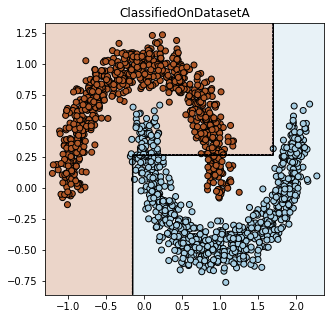

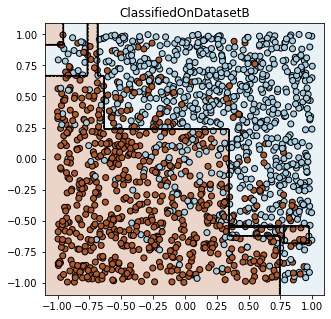

In [12]:
def plot(X, Y, root, title  = "", h = 0.01):
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plot_x = np.c_[xx.ravel(), yy.ravel()]
    Z = eval_decision_tree(root, plot_x)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k')
    plt.title(title)
plot(X_train_A, Y_train_A, learn_tree_A_accuracy, title = "ClassifiedOnDatasetA")
plot(X_train_B, Y_train_B, learn_tree_B_accuracy, title = "ClassifiedOnDatasetB")


# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [24]:
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right= None, node_position = None,*, result = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.node_position = node_position
        self.result = result
def H(P):
    if P == 1 or P == 0:
        return 0
    else:
        return P*np.log2(1/P) + (1-P)*np.log2(1/(1-P))
def best_split(X,Y, criterion, feat_idxs):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    if criterion =='accuracy':
        accuracy  = -1
        for feat_indx in feat_idxs:
            X_column = X[:, feat_indx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                left_idxs = np.argwhere(X_column < thr).flatten()
                right_idxs = np.argwhere(X_column >= thr).flatten()
                Y_left = Y[left_idxs]
                Y_right = Y[right_idxs]
                threshold_class_Y_left = 1 if np.argmax(np.histogram(Y_left, bins = 2)[0]) == 1 else -1
                threshold_class_Y_right = 1 if np.argmax(np.histogram(Y_right, bins = 2)[0]) == 1 else -1
                count  = 0
                for index in left_idxs:
                    if Y[index] == threshold_class_Y_left:
                        count += 1
                for index in right_idxs:
                    if Y[index] == threshold_class_Y_right:
                        count += 1
                potential_accuracy = count/n_samples
                if potential_accuracy >= accuracy:
                    accuracy = potential_accuracy
                    threshold_Y_left = Y_left
                    threshold_Y_right = Y_right
                    threshold_X_left = X[left_idxs, :]
                    threshold_X_right = X[right_idxs, :]
                    threshold_feat_indx = feat_indx
                    threshold_thr = thr
        return threshold_Y_left, threshold_Y_right, threshold_X_left, threshold_X_right, threshold_feat_indx, threshold_thr
    if criterion =='entropy':
        entropy = 10000
        for feat_indx in feat_idxs:
            X_column = X[:, feat_indx]
            thresholds = np.unique(X_column)
            for thr in thresholds:
                left_idxs = np.argwhere(X_column < thr).flatten()
                right_idxs = np.argwhere(X_column >= thr).flatten()
                Y_left = Y[left_idxs]
                Y_right = Y[right_idxs]
                threshold_class_Y_left = 1 if np.argmax(np.histogram(Y_left, bins = 2)[0]) == 1 else -1
                threshold_class_Y_right = 1 if np.argmax(np.histogram(Y_right, bins = 2)[0]) == 1 else -1
                count_left, count_right = 0, 0
                for index in left_idxs:
                    if Y[index] == threshold_class_Y_left:
                        count_left += 1
                for index in right_idxs:
                    if Y[index] == threshold_class_Y_right:
                        count_right += 1
                if len(Y_left) != 0 and len(Y_right) != 0:
                    potential_entropy = (len(Y_left)/len(Y))*H(count_left/len(Y_left)) + (len(Y_right)/len(Y))*H(count_right/len(Y_right))
                if len(Y_left) == 0:
                    potential_entropy = (len(Y_right)/len(Y))*H(count_right/len(Y_right))
                if len(Y_right) == 0:
                     potential_entropy = (len(Y_left)/len(Y))*H(count_left/len(Y_left))
                if potential_entropy < entropy:
                    entropy = potential_entropy
                    threshold_Y_left = Y_left
                    threshold_Y_right = Y_right
                    threshold_X_left = X[left_idxs, :]
                    threshold_X_right = X[right_idxs, :]
                    threshold_feat_indx = feat_indx
                    threshold_thr = thr
        return threshold_Y_left, threshold_Y_right, threshold_X_left, threshold_X_right, threshold_feat_indx, threshold_thr

def add_node(X, Y, node_position, num_nodes_stop, criterion='accuracy', b = 0.5):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    if node_position > num_nodes_stop or n_labels == 1 or n_samples <= 0:
        threshold_class = 1 if np.argmax(np.histogram(Y, bins = 2)[0]) == 1 else -1
        return Node(result = threshold_class)
    feat_idxs = np.random.choice(n_feats, int(b*n_feats), replace = False)
    Y_left, Y_right, X_left, X_right, feat, thr = best_split(X,Y, criterion, feat_idxs)
    left = add_node(X_left, Y_left, 2*node_position, num_nodes_stop, criterion)
    right = add_node(X_right, Y_right, 2*node_position + 1, num_nodes_stop, criterion)
    return Node(feat, thr, left, right, node_position)

def train_decision_tree(X, Y, num_nodes_stop=1, criterion='accuracy'):
    n_features = X.shape[1]
    return add_node(X,Y,1,num_nodes_stop,criterion)

def travesre_tree(root, x):
    if root.result != None:
        return root.result
    if x[root.feature] < root.threshold:
        return travesre_tree(root.left, x)
    return travesre_tree(root.right, x)
    

def eval_decision_tree(tree, test_X):
    return np.array([travesre_tree(tree, x) for x in test_X])

def train_random_forest(X, Y, num_trees=10, num_nodes_stop=1, 
                        criterion='accuracy', a=0.5, b=0.5):
    n_samples, n_feats = X.shape
    forest = []
    for i in range(num_trees):
        idx = np.random.choice(n_samples, int(n_samples*a), replace = True)
        X_random, Y_random = X[idx], Y[idx]
        tree  = train_decision_tree(X_random, Y_random, num_nodes_stop, criterion)
        forest.append(tree)
    return forest

def predict_forest(forest , x):
    pred = np.array([travesre_tree(tree, x) for tree in forest])
    return 1 if np.argmax(np.histogram(pred, bins = 2)[0]) == 1 else -1
    
def eval_random_forest(random_forest, test_X):
    return np.array([predict_forest(random_forest, x) for x in test_X])




In [28]:
def best_num_node_stop_tree(X, Y, criterion='accuracy'):
    l = int(X.shape[0]*0.6)
    X_train = X[0:l]
    Y_train = Y[0:l]
    Y_test = Y[l:]
    X_test = X[l:]
    error = 101
    for num_trees in [10,25,50,75,100]:
        tree =  train_random_forest(X_train, Y_train, num_trees = num_trees, criterion='accuracy')
        Y_pred =  eval_random_forest(tree, X_test)
        error_temp = zero_one_error(Y_test, Y_pred)
        if error > error_temp:
            error = error_temp
            best_tree = num_trees
    return  best_tree
num_tree_A_accuracy = best_num_node_stop_tree(X_train_A, Y_train_A, criterion='accuracy')
print(num_tree_A_accuracy)
num_tree_A_entropy = best_num_node_stop_tree(X_train_A, Y_train_A, criterion='entropy')
print(num_tree_A_entropy)
learn_forest_A_accuracy =  train_random_forest(X_train_A, Y_train_A, num_trees = num_tree_A_accuracy , criterion='accuracy')
print(zero_one_error(Y_train_A, eval_random_forest(learn_forest_A_accuracy, X_train_A)))
print(zero_one_error(Y_test_A, eval_random_forest(learn_forest_A_accuracy, X_test_A)))
learn_forest_A_entropy =  train_random_forest(X_train_A, Y_train_A, num_trees = num_tree_A_entropy, criterion='entropy')
print(zero_one_error(Y_train_A, eval_random_forest(learn_forest_A_entropy, X_train_A)))
print(zero_one_error(Y_test_A, eval_random_forest(learn_forest_A_entropy, X_test_A)))

num_tree_B_accuracy = best_num_node_stop_tree(X_train_B, Y_train_B, criterion='accuracy')
print(num_tree_B_accuracy)
num_tree_B_entropy = best_num_node_stop_tree(X_train_B, Y_train_B, criterion='entropy')
print(num_tree_B_entropy)
learn_forest_B_accuracy =  train_random_forest(X_train_B, Y_train_B, num_trees = num_tree_B_accuracy,criterion='accuracy')
print(zero_one_error(Y_train_B, eval_random_forest(learn_forest_B_accuracy, X_train_B)))
print(zero_one_error(Y_test_B, eval_random_forest(learn_forest_B_accuracy, X_test_B)))
learn_forest_B_entropy =  train_random_forest(X_train_B, Y_train_B, num_trees = num_tree_B_entropy, criterion='entropy')
print(zero_one_error(Y_train_B, eval_random_forest(learn_forest_B_entropy, X_train_B)))
print(zero_one_error(Y_test_B, eval_random_forest(learn_forest_B_entropy, X_test_B)))

num_tree_C_accuracy = best_num_node_stop_tree(X_train_C, Y_train_C, criterion='accuracy')
print(num_tree_C_accuracy)
num_tree_C_entropy = best_num_node_stop_tree(X_train_C, Y_train_C, criterion='entropy')
print(num_tree_C_entropy)
learn_forest_C_accuracy =  train_random_forest(X_train_C, Y_train_C, num_trees = num_tree_C_accuracy,criterion='accuracy')
print(zero_one_error(Y_train_C, eval_random_forest(learn_forest_C_accuracy, X_train_C)))
print(zero_one_error(Y_test_C, eval_random_forest(learn_forest_C_accuracy, X_test_C)))
learn_forest_C_entropy =  train_random_forest(X_train_C, Y_train_C, num_trees = num_tree_C_entropy, criterion='entropy')
print(zero_one_error(Y_train_C, eval_random_forest(learn_forest_C_entropy, X_train_C)))
print(zero_one_error(Y_test_C, eval_random_forest(learn_forest_C_entropy, X_test_C)))

num_tree_D_accuracy = best_num_node_stop_tree(X_train_D, Y_train_D, criterion='accuracy')
print(num_tree_D_accuracy)
num_tree_D_entropy = best_num_node_stop_tree(X_train_D, Y_train_D, criterion='entropy')
print(num_tree_D_entropy)
learn_forest_D_accuracy =  train_random_forest(X_train_D, Y_train_D, num_trees = num_tree_D_accuracy,criterion='accuracy')
print(zero_one_error(Y_train_D, eval_random_forest(learn_forest_D_accuracy, X_train_D)))
print(zero_one_error(Y_test_D, eval_random_forest(learn_forest_D_accuracy, X_test_D)))
learn_forest_D_entropy =  train_random_forest(X_train_D, Y_train_D, num_trees = num_tree_D_entropy, criterion='entropy')
print(zero_one_error(Y_train_D, eval_random_forest(learn_forest_D_entropy, X_train_D)))
print(zero_one_error(Y_test_D, eval_random_forest(learn_forest_D_entropy, X_test_D)))

75
75
0.242
0.272
0.11
0.108
50
25
0.38133333333333336
0.372
0.2826666666666667
0.31
75
100
0.23333333333333334
0.26262626262626265
0.242
0.30976430976430974
75
100
0.3275
0.21893491124260356
0.06
0.07100591715976332


|HyperParameter||accuracy||entropy|
|-------||------||--------|
|DatasetA||75||75|
|DatasetB||50||25|
|DatasetC||75||100|
|Dataset||75||100|

|DatasetA-error||accuracy||entropy|
|-------||------||--------|
|Train||0.242||0.11|
|Test||0.272||0.108|

|DatasetB-error||accuracy||entropy|
|-------||------||--------|
|Train||0.38||0.28|
|Test||0.37||0.31|

|DatasetC-error||accuracy||entropy|
|-------||------||--------|
|Train||0.23||0.24|
|Test||0.26||0.31|

|DatasetD-error||accuracy||entropy|
|-------||------||--------|
|Train||0.3275||0.06|
|Test||0.22||0.07|
 











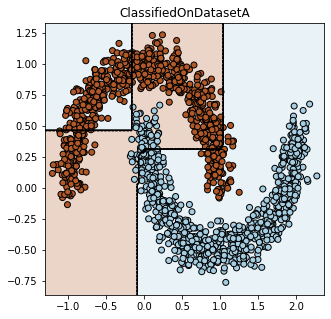

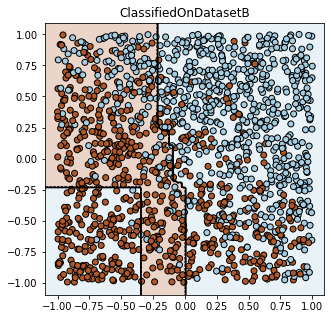

In [30]:
def plot_for_forest(X, Y, root, title  = "", h = 0.01):
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plot_x = np.c_[xx.ravel(), yy.ravel()]
    Z = eval_random_forest(root, plot_x)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k')
    plt.title(title)
plot_for_forest(X_train_A, Y_train_A, learn_forest_A_accuracy, title = "ClassifiedOnDatasetA")
plot_for_forest(X_train_B, Y_train_B, learn_forest_B_accuracy, title = "ClassifiedOnDatasetB") 


# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child, ..., great^4 grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs iterations. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [20]:
class Node:
    def __init__(self, feature = None, threshold = None, left = None, right= None, depth = None,*, result = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.depth = depth
        self.result = result
def best_split(X,Y,w):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    accuracy  = -1
    for feat_indx in range(n_feats):
        X_column = X[:, feat_indx]
        thresholds = np.unique(X_column)
        for thr in thresholds:
            left_idxs = np.argwhere(X_column < thr).flatten()
            right_idxs = np.argwhere(X_column >= thr).flatten()
            Y_left = Y[left_idxs]
            Y_right = Y[right_idxs]
            w_left = w[left_idxs]
            w_right = w[right_idxs]
            threshold_class_Y_left = 1 if np.argmax(np.histogram(Y_left, bins = 2)[0]) == 1 else -1
            threshold_class_Y_right = 1 if np.argmax(np.histogram(Y_right, bins = 2)[0]) == 1 else -1
            count  = 0
            for index in left_idxs:
                if Y[index] == threshold_class_Y_left:
                     count += w[index]
            for index in right_idxs:
                if Y[index] == threshold_class_Y_right:
                    count += w[index]
            potential_accuracy = count/sum(w)
            if potential_accuracy >= accuracy:
                    accuracy = potential_accuracy
                    threshold_Y_left = Y_left
                    threshold_Y_right = Y_right
                    threshold_X_left = X[left_idxs, :]
                    threshold_X_right = X[right_idxs, :]
                    threshold_feat_indx = feat_indx
                    threshold_thr = thr
        return threshold_Y_left, threshold_Y_right, threshold_X_left, threshold_X_right, threshold_feat_indx, threshold_thr
def add_node(X, Y, w, depth, max_depth = 1):
    n_samples, n_feats = X.shape
    n_labels = len(np.unique(Y))
    if(depth < max_depth or n_labels == 1 or n_samples <= 0):
        threshold_class = 1 if np.argmax(np.histogram(Y, bins = 2)[0]) == 1 else -1
        return Node(result = threshold_class)
    Y_left, Y_right, X_left, X_right, feat, thr = best_split(X,Y, w)
    left = add_node(X_left, Y_left, w, depth + 1, max_depth)
    right = add_node(X_right, Y_right, w, depth + 1, max_depth)
    return Node(feat, thr, left, right, depth)
def travesre_tree(root, x):
    if root.result != None:
        return root.result
    if x[root.feature] < root.threshold:
        return travesre_tree(root.left, x)
    return travesre_tree(root.right, x)
def eval_decision_tree(tree, test_X):
    return np.array([travesre_tree(tree, x) for x in test_X])
def weak_learner(X, Y, w, max_depth = 1):
    weak_classifier = add_node(X, Y, w, 1, max_depth)
    pred = eval_decision_tree(weak_classifier, X)
    gamma  = 1/2 - sum(w[Y == Y])/sum(w)
    bita = (0.5+gamma)/(0.5-gamma)
    w_t = np.zeros((len(w)))
    for i in range(len(w)):
        w_t[i] = w[i]*bita if Y[i] != pred[i] else w[i]
    return weak_classifier, bita, w_t

##MAINfUNCTION
def adaboost(X, Y, max_depth = 1, iteration = 50):
    clf = []
    b =  np.empty((iteration))
    w = np.ones((X.shape[0]))
    for i in range(iteration):
        weak_classifier, bita, w_t = weak_learner(X,Y,w, max_depth)
        clf.append(weak_classifier)
        b[i] = bita
        w = w_t
    return clf, b


def eval_adaboost(clf, b, X_test, itreation = 50):
        y_pred = np.zeros((X_test.shape[0]))
        for i in range(itreation):
            y_temp = np.zeros((X_test.shape[0]))
            for j in range(X_test.shape[0]):
                y_temp[j] = travesre_tree(clf[i], X_test[j])*np.log(b[i])
            y_pred = y_pred + y_temp
        return np.sign(y_pred)

In [18]:
def error_plot():
    

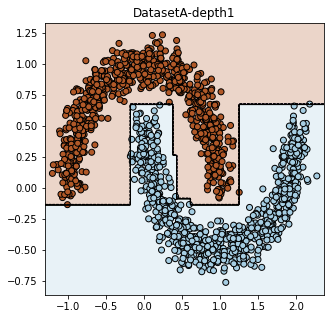

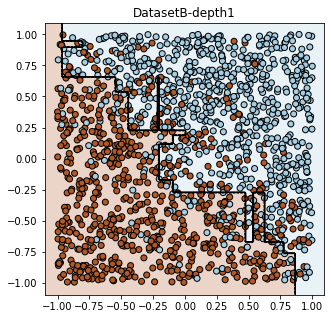

In [19]:
def plot_for_adaboost(X, Y, depth = 1 ,title  = "", h = 0.01):
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plot_x = np.c_[xx.ravel(), yy.ravel()]
    clf,b = adaboost(X, Y, depth)
    Z = eval_adaboost(clf, b, plot_x):
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired_r', edgecolors='k')
    plt.title(title)
plot_for_adaboost(X_train_A, Y_train_A, 1 , title  = "DatasetA-depth1")
plot_for_adaboost(X_train_B, Y_train_B, 1,  title  = "DatasetB-depth1")

Textwrite cell: